In [1]:
import pandas_datareader as pdr
import pandas as pd
import datetime as datetime

In [2]:
df_tesla=pdr.get_data_yahoo('TSLA')
df_tesla

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-03-08,50.014000,49.063999,49.400002,49.374001,18626000.0,49.374001
2017-03-09,49.731998,48.599998,49.526001,48.980000,19396500.0,48.980000
2017-03-10,49.299999,48.599998,49.242001,48.737999,15331500.0,48.737999
2017-03-13,49.369999,48.556000,48.964001,49.234001,15113000.0,49.234001
2017-03-14,51.624001,49.203999,49.222000,51.599998,37992000.0,51.599998
...,...,...,...,...,...,...
2022-03-01,889.880005,853.780029,869.679993,864.369995,24922300.0,864.369995
2022-03-02,886.479980,844.270020,872.130005,879.890015,24881100.0,879.890015
2022-03-03,886.440002,832.599976,878.770020,839.289978,20541200.0,839.289978


### Simple moving average

In [15]:
df_tesla['Open:10 day rolling']=df_tesla['Open'].rolling(window=10,min_periods=1).mean()
df_tesla['Open:20 day rolling']=df_tesla['Open'].rolling(window=20,min_periods=1).mean() 
df_tesla['Open:30 day rolling']=df_tesla['Open'].rolling(window=30,min_periods=1).mean() 

In [13]:
df_tesla['Open:10 day rolling']

Date
2017-03-08     49.400002
2017-03-09     49.463001
2017-03-10     49.389334
2017-03-13     49.283001
2017-03-14     49.270801
                 ...    
2022-03-01    847.217999
2022-03-02    844.431000
2022-03-03    840.903003
2022-03-04    834.487000
2022-03-07    831.516998
Name: Open:10 day rolling, Length: 1259, dtype: float64

<AxesSubplot:xlabel='Date'>

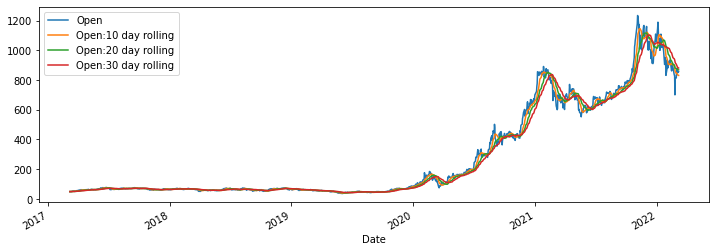

In [16]:
df_tesla[['Open','Open:10 day rolling','Open:20 day rolling','Open:30 day rolling']].plot(figsize=(12,4))

### Cummulative Moving Average 
Using Expanding

<AxesSubplot:xlabel='Date'>

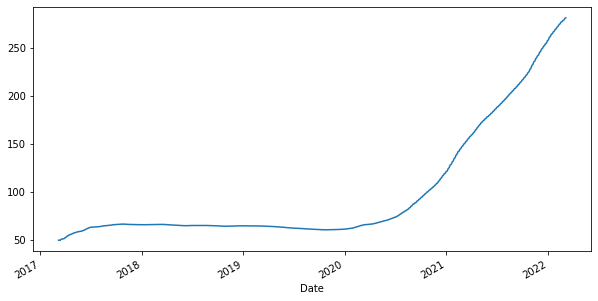

In [17]:
df_tesla['Open'].expanding().mean().plot(figsize=(10,5))

### Exponential Moving Average
using EWM

In [18]:
df_tesla['EMA_0.1']=df_tesla['Open'].ewm(alpha=0.1, adjust=False).mean()

<AxesSubplot:xlabel='Date'>

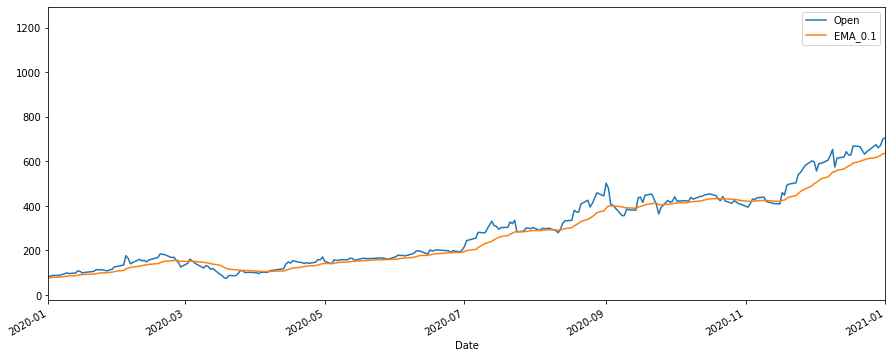

In [19]:
df_tesla[['Open','EMA_0.1']].plot(xlim=['2020-01-01','2021-01-01'],figsize=(15,6))